CREATING ALL FOUR ENTANGLED STATES

# Lab 3 Bell States

Prerequisite   
[Ch.2.2 Multiple Qubits and Entangled States](https://qiskit.org/textbook/ch-gates/multiple-qubits-entangled-states.html)

Applications   
[Ch.3.11 Quantum Teleportation](https://qiskit.org/textbook/ch-algorithms/teleportation.html)   
[Ch.3.12 Superdense Coding](https://qiskit.org/textbook/ch-algorithms/superdense-coding.html)   
[Ch.3.13 Quantum Key Distribution](https://qiskit.org/textbook/ch-algorithms/quantum-key-distribution.html)


In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit
from qiskit import Aer, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere, plot_state_city, plot_state_paulivec, plot_state_hinton

# Ignote warnings
import warnings
warnings.filterwarnings('ignore')

# Define backend
sim = Aer.get_backend('aer_simulator')

<h2 style="font-size:24px;">Part 1: Bell State using Controlled-X gate</h2>

<br>
<div style="background: #E8E7EB; border-radius: 5px;
-moz-border-radius: 5px;">
  <p style="background: #800080;
            border-radius: 5px 5px 0px 0px;
            padding: 10px 0px 10px 10px;
            font-size:18px;
            color:white;
            "><b>Goal</b></p>
    <p style=" padding: 0px 0px 10px 10px;
              font-size:16px;">Create Bell state using CNOT or controlled-X gate.</p>
</div>

In [2]:
def createBellStates(inp1, inp2):
    qc = QuantumCircuit(2)
    qc.reset(range(2))

    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)

    qc.barrier()

    qc.h(0)
    qc.cx(0,1)

    qc.save_statevector()
    qobj = assemble(qc)
    result = sim.run(qobj).result()
    state = result.get_statevector()

    return qc, state, result

Note: Since these qubits are in entangled state, their state cannot be written as two separate qubit states. This also means that we lose information when we try to plot our state on separate Bloch spheres as seen below.

For inputs 0 0 Representation of Entangled States are:


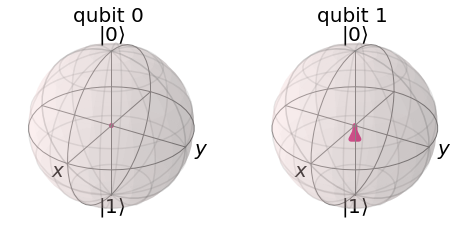



For inputs 0 1 Representation of Entangled States are:


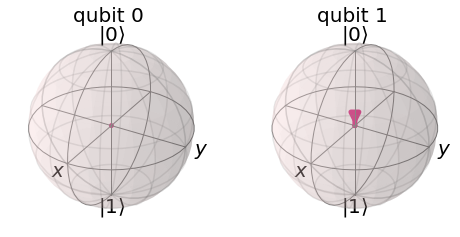



For inputs 1 0 Representation of Entangled States are:


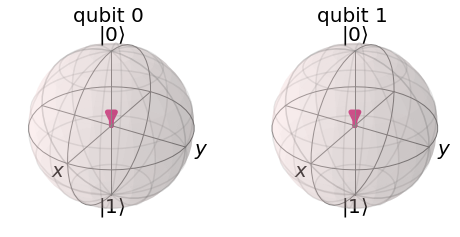



For inputs 1 1 Representation of Entangled States are:


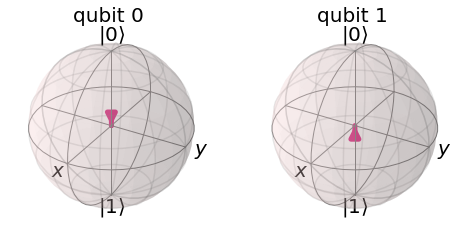

In [3]:
print('Note: Since these qubits are in entangled state, their state cannot be written as two separate qubit states. This also means that we lose information when we try to plot our state on separate Bloch spheres as seen below.\n')
        
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, state, result = createBellStates(inp1, inp2)
        
        print('For inputs',inp1,inp2,'Representation of Entangled States are:')
        
        # Uncomment any of the below functions to visualize the resulting quantum states
        
        # Draw the quantum circuit
        #display(qc.draw())

        # Plot states on QSphere
        #display(plot_state_qsphere(state))

        # Plot states on Bloch Multivector
        display(plot_bloch_multivector(state))

        # Plot histogram
        #display(plot_histogram(result.get_counts()))
        
        # Plot state matrix like a city
        #display(plot_state_city(state))

        # Represent state matix using Pauli operators as the basis
        #display(plot_state_paulivec(state))

        # Plot state matrix as Hinton representation
        #display(plot_state_hinton(state))
        
        print('\n')

|Input State|Circuit|QSphere Plot|Histogram|City Plot|Paulivec|Hinton Plot|
|-|-|-|-|-|-|-|
|q0 = 0; q1 = 0|![alt](image/L3_Circuit_00>.png)|![alt](image/L3_QSphere_00>.png)|![alt](image/L3_Histogram_00>.png)|![alt](image/L3_CityPlot_00>.png)|![alt](image/L3_Paulivec_00>.png)|![alt](image/L3_HintonPlot_00>.png)|
|q0 = 0; q1 = 1|![alt](image/L3_Circuit_01>.png)|![alt](image/L3_QSphere_01>.png)|![alt](image/L3_Histogram_01>.png)|![alt](image/L3_CityPlot_01>.png)|![alt](image/L3_Paulivec_01>.png)|![alt](image/L3_HintonPlot_01>.png)|
|q0 = 1; q1 = 0|![alt](image/L3_Circuit_10>.png)|![alt](image/L3_QSphere_10>.png)|![alt](image/L3_Histogram_10>.png)|![alt](image/L3_CityPlot_10>.png)|![alt](image/L3_Paulivec_10>.png)|![alt](image/L3_HintonPlot_10>.png)|
|q0 = 1; q1 = 1|![alt](image/L3_Circuit_11>.png)|![alt](image/L3_QSphere_11>.png)|![alt](image/L3_Histogram_11>.png)|![alt](image/L3_CityPlot_11>.png)|![alt](image/L3_Paulivec_11>.png)|![alt](image/L3_HintonPlot_11>.png)|

<h2 style="font-size:24px;">Part 2: Real Quantum Device</h2>

<br>
<div style="background: #E8E7EB; border-radius: 5px;
-moz-border-radius: 5px;">
  <p style="background: #800080;
            border-radius: 5px 5px 0px 0px;
            padding: 10px 0px 10px 10px;
            font-size:18px;
            color:white;
            "><b>Goal</b></p>
    <p style=" padding: 0px 0px 10px 10px;
              font-size:16px;">Run Bell State circuit on real quantum device.</p>
</div>

In [ ]:
from qiskit import IBMQ, execute
from qiskit.providers.ibmq import least_busy
from qiskit.tools import job_monitor

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2
                                    and not x.configuration().simulator
                                    and x.status().operational==True))

In [ ]:
def createBSRealDevice(inp1, inp2):
    qc = QuantumCircuit(2)
    qc.reset(range(2))

    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)

    qc.barrier()

    qc.h(0)
    qc.cx(0,1)

    job = execute(qc, backend=backend, shots=1000)
    job_monitor(job)
    result = job.result()

    return qc, result

In [ ]:
inp1 = 0
inp2 = 0

        
# Draw the quantum circuit
#display(qc.draw())

print('For inputs',inp1,inp2,'Representation of Entangled States are,')
        
#first results
qc, first_result = createBSRealDevice(inp1, inp2)
first_counts = first_result.get_counts()

#second results
qc, second_result = createBSRealDevice(inp1, inp2)
second_counts = second_result.get_counts()


# Plot results on histogram with legend
legend = ['First execution', 'Second execution']
plot_histogram([first_ounts, second_counts], legend=legend)
        
print('\n')

In [4]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.18.3', 'qiskit-aer': '0.9.1', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.18.1', 'qiskit-aqua': '0.9.5', 'qiskit': '0.32.1', 'qiskit-nature': '0.2.2', 'qiskit-finance': '0.2.1', 'qiskit-optimization': '0.2.3', 'qiskit-machine-learning': '0.2.1'}